In [1]:
import numpy as np
import matplotlib.pyplot as plt

from branchingmodel.simulation import simulate_branching_model

In [8]:
p_first_layer = 0.5


m_gammas = np.linspace(0,4,401)
p_stars = np.zeros_like(m_gammas)
p_apprx = np.zeros_like(m_gammas)
iters_to_convergence = np.zeros_like(m_gammas)

for i,mg in enumerate(m_gammas):
    eps = 1e-6
    tol = 1
    p_star = p_first_layer
    iters = 0
    while tol>eps:
        p_star_next = 1 - np.exp(-mg*p_star)
        tol = abs(p_star - p_star_next)
        p_star = p_star_next
        iters += 1
    iters_to_convergence[i] = iters

    p_stars[i] = p_star
    p_apprx[i] = 2*(mg - 1)/mg if mg>=1 and mg<=2 else None

Text(0, 0.5, '$p^*$')

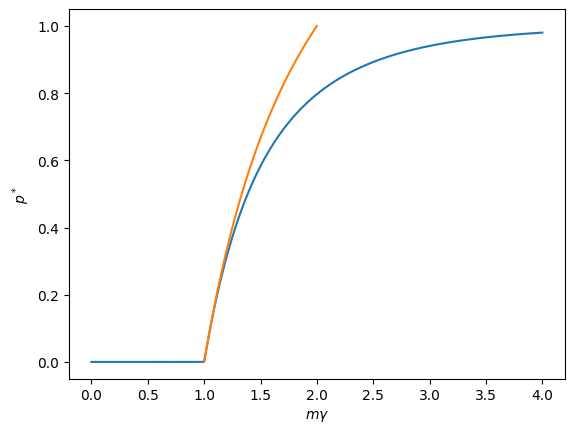

In [9]:
plt.plot(m_gammas, p_stars)
plt.plot(m_gammas, p_apprx)
plt.xlabel('$m\gamma$')
plt.ylabel('$p^*$')

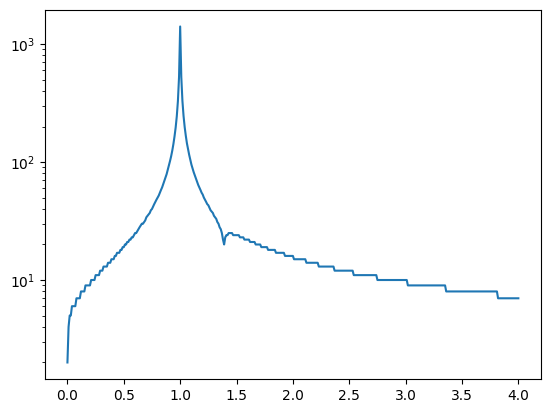

In [10]:
plt.semilogy(m_gammas, iters_to_convergence)

In [ ]:
num_neurons_per_layer = 1000
num_layers = 100
connections_per_neuron = 4
transmission_probability = 0.25
p_spont = 0
prob_first_layer_on = 0.5
total_time_steps = num_layers-1